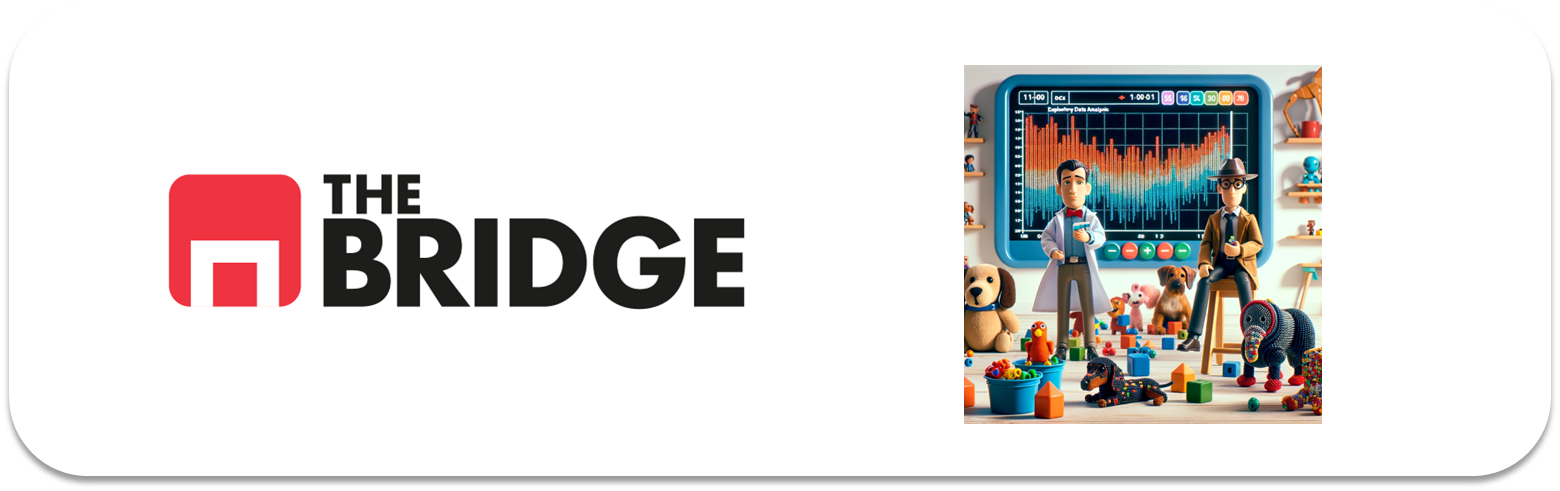

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency, mannwhitneyu

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

In [2]:
import warnings
warnings.filterwarnings("ignore")

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_7/Unidad_2/Practica_Obligatoria/data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic_cleaned = df.drop(columns=["deck","survived","pclass","embarked"])

KeyError: "['deck', 'survived', 'pclass', 'embarked'] not found in axis"

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic_cleaned['family_members'] = df_titanic_cleaned['parch'] + df_titanic_cleaned['sibsp']
df_titanic_cleaned = df_titanic_cleaned.drop(columns=["parch", "sibsp"], errors='ignore')

TypeError: 'NoneType' object is not subscriptable

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
df_titanic_cleaned['embark_town'] = df_titanic_cleaned['embark_town'].fillna(df_titanic_cleaned['embark_town'].mode()[0])


TypeError: 'NoneType' object is not subscriptable

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [5]:
es_woman = df_titanic_cleaned.who == "woman"
es_child = df_titanic_cleaned.who == "child"
es_man = df_titanic_cleaned.who == "man"

media_woman = df_titanic_cleaned.loc[es_woman,"age"].mean()
media_child = df_titanic_cleaned.loc[es_child,"age"].mean()
media_man = df_titanic_cleaned.loc[es_man,"age"].mean()

es_age_nulo = df_titanic_cleaned.age.isna()

df_titanic_cleaned.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic_cleaned.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic_cleaned.loc[es_man & es_age_nulo, "age"] = media_man

AttributeError: 'NoneType' object has no attribute 'who'

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [13]:
#1
# Columna para clasificar como 'Child' o 'Adult'
df_titanic_cleaned['age_group'] = df_titanic_cleaned['age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Supervivencia absoluta y relativa según género y grupo de edad
survival_gender_age = df_titanic_cleaned.groupby(['sex', 'age_group', 'alive']).size().unstack(fill_value=0)
survival_gender_age['Total'] = survival_gender_age.sum(axis=1)
survival_gender_age['Survival Rate'] = survival_gender_age['yes'] / survival_gender_age['Total'] * 100

# Test de chi-cuadrado: género y supervivencia
contingency_gender = pd.crosstab(df_titanic_cleaned['sex'], df_titanic_cleaned['alive'])
chi2_gender, p_gender, _, _ = chi2_contingency(contingency_gender)

# Test de chi-cuadrado: grupo de edad y supervivencia
contingency_age_group = pd.crosstab(df_titanic_cleaned['age_group'], df_titanic_cleaned['alive'])
chi2_age_group, p_age_group, _, _ = chi2_contingency(contingency_age_group)

# Resultados
print("Supervivencia por género y grupo de edad:")
print(survival_gender_age)
print("\nResultados Chi-Cuadrado:")
print(f"Género - Chi2: {chi2_gender}, P-Value: {p_gender}")
print(f"Grupo de Edad - Chi2: {chi2_age_group}, P-Value: {p_age_group}")


Supervivencia por género y grupo de edad:
alive              no  yes  Total  Survival Rate
sex    age_group                                
female Adult       64  195    259      75.289575
       Child       17   38     55      69.090909
male   Adult      433   86    519      16.570328
       Child       35   23     58      39.655172

Resultados Chi-Cuadrado:
Género - Chi2: 260.71702016732104, P-Value: 1.197357062775565e-58
Grupo de Edad - Chi2: 12.56903165970517, P-Value: 0.0003921917414076711


***En términos absolutos:**
Sobrevivieron más mujeres que hombres y niños.

***En términos relativos:***
La tasa de supervivencia de las mujeres fue significativamente más alta que la de los hombres y los niños.

***Relación estadística:***
El test de Chi-cuadrado muestra una relación estadísticamente significativa entre el género y la supervivencia (𝑝<0.05).
También existe una relación significativa entre el grupo de edad (niño/adulto) y la supervivencia (𝑝<0.05).

In [ ]:
#Hecho en clase
# plot_categorical_relationship_fin(df_titanic_cleaned,"who","alive", relative_freq=True, show_values=True)

# tabla_contingencia = pd.crosstab(df_titanic_cleaned["alive"],df_titanic_cleaned["who"])
# chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# print("Valor chi cuadradro:", chi2)
# print("P-Value:", p)
# print("Grados de libertad:", dof)
# print("Tabla de frecuencias Esperadas:\n", expected)

In [14]:
#2
# Supervivencia absoluta y relativa según clase
survival_class = df_titanic_cleaned.groupby(['class', 'alive']).size().unstack(fill_value=0)
survival_class['Total'] = survival_class.sum(axis=1)
survival_class['Survival Rate'] = survival_class['yes'] / survival_class['Total'] * 100

# Test de chi-cuadrado: clase y supervivencia
contingency_class = pd.crosstab(df_titanic_cleaned['class'], df_titanic_cleaned['alive'])
chi2_class, p_class, _, _ = chi2_contingency(contingency_class)

# Resultados
print("Supervivencia por clase:")
print(survival_class)
print("\nResultados Chi-Cuadrado:")
print(f"Clase - Chi2: {chi2_class}, P-Value: {p_class}")

Supervivencia por clase:
alive    no  yes  Total  Survival Rate
class                                 
First    80  136    216      62.962963
Second   97   87    184      47.282609
Third   372  119    491      24.236253

Resultados Chi-Cuadrado:
Clase - Chi2: 102.88898875696056, P-Value: 4.549251711298793e-23


***En términos absolutos:***
La mayoría de los supervivientes viajaban en primera clase.

***En términos relativos:***
La tasa de supervivencia más alta se dio en primera clase, seguida de segunda y tercera.

***Relación estadística:***
El test de Chi-cuadrado confirma una relación estadísticamente significativa entre la clase del pasajero y la supervivencia (p<0.05).

In [ ]:
#Hecho en clase
# plot_categorical_relationship_fin(df_titanic_cleaned,"who","class", relative_freq=True, show_values=True)

# tabla_contingencia = pd.crosstab(df_titanic_cleaned["class"],df_titanic_cleaned["who"])
# chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# print("Valor chi cuadradro:", chi2)
# print("P-Value:", p)
# print("Grados de libertad:", dof)
# print("Tabla de frecuencias Esperadas:\n", expected)

In [ ]:
#Hecho en clase
# plot_categorical_relationship_fin(df_titanic_cleaned,"class","alive", relative_freq=True, show_values=True)

# tabla_contingencia = pd.crosstab(df_titanic_cleaned["alive"],df_titanic_cleaned["class"])
# chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# print("Valor chi cuadradro:", chi2)
# print("P-Value:", p)
# print("Grados de libertad:", dof)
# print("Tabla de frecuencias Esperadas:\n", expected)

In [15]:
#3
# Supervivencia absoluta y relativa según ciudad de embarque
survival_city = df_titanic_cleaned.groupby(['embark_town', 'alive']).size().unstack(fill_value=0)
survival_city['Total'] = survival_city.sum(axis=1)
survival_city['Survival Rate'] = survival_city['yes'] / survival_city['Total'] * 100

# Test de chi-cuadrado: ciudad de embarque y supervivencia
contingency_city = pd.crosstab(df_titanic_cleaned['embark_town'], df_titanic_cleaned['alive'])
chi2_city, p_city, _, _ = chi2_contingency(contingency_city)

# Resultados
print("Supervivencia por ciudad de embarque:")
print(survival_city)
print("\nResultados Chi-Cuadrado:")
print(f"Ciudad - Chi2: {chi2_city}, P-Value: {p_city}")

Supervivencia por ciudad de embarque:
alive         no  yes  Total  Survival Rate
embark_town                                
Cherbourg     75   93    168      55.357143
Queenstown    47   30     77      38.961039
Southampton  427  219    646      33.900929

Resultados Chi-Cuadrado:
Ciudad - Chi2: 25.964452881874784, P-Value: 2.3008626481449577e-06


***En términos absolutos:***
La mayoría de los supervivientes embarcaron en Southampton.

***En términos relativos:***
La tasa de supervivencia más alta corresponde a los pasajeros que embarcaron en Cherburgo.

***Relación estadística:***
El test de Chi-cuadrado confirma una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia (p<0.05).


In [ ]:
#Hecho en clase
# plot_categorical_relationship_fin(df_titanic_cleaned,"embark_town","alive", relative_freq=True, show_values=True)

# tabla_contingencia = pd.crosstab(df_titanic_cleaned["alive"],df_titanic_cleaned["embark_town"])
# chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# print("Valor chi cuadradro:", chi2)
# print("P-Value:", p)
# print("Grados de libertad:", dof)
# print("Tabla de frecuencias Esperadas:\n", expected)

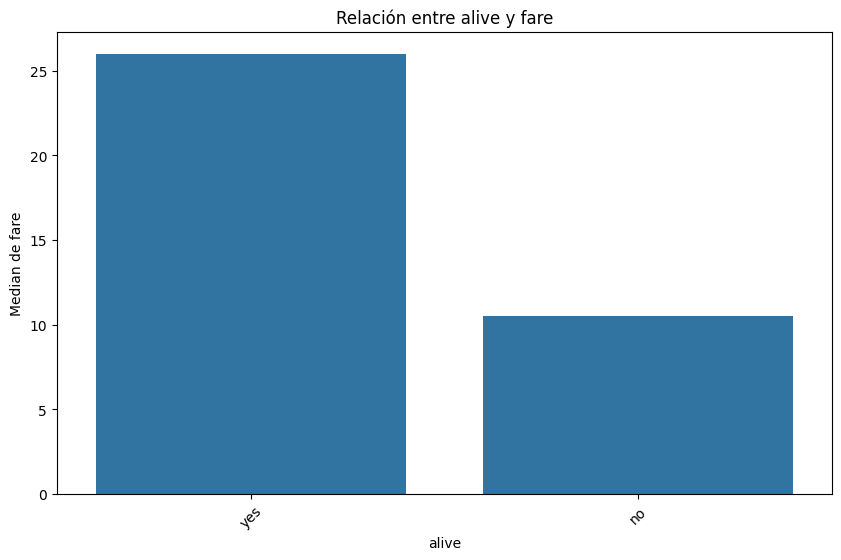

In [18]:
#4
plot_categorical_numerical_relationship(df_titanic_cleaned,"alive","fare", measure = "median")

Los pasajeros que pagaron pasajes más caros tuvieron mayores probabilidades de sobrevivir.

In [ ]:
#Hecho en clase
#plot_grouped_boxplots(df_titanic_cleaned, "alive","class")
#plot_grouped_histograms(df_titanic_cleaned, "alive","class")

# grupo_a= df_titanic_cleaned.loc[df_titanic_cleaned.alive == "yes"]["fare"]
# grupo_b= df_titanic_cleaned.loc[df_titanic_cleaned.alive == "no"]["fare"]
# u_stat,p_valor = mannwhitneyu(grupo_a,grupo_b)
# print(u_stat)
# print(p_valor)

In [19]:
#5
no_fare_passengers = df_titanic_cleaned[df_titanic_cleaned['fare'] == 0]
highest_fare_passenger = df_titanic_cleaned[df_titanic_cleaned['fare'] == df_titanic_cleaned['fare'].max()]

# Resultados
print("Pasajeros que no pagaron:")
print(no_fare_passengers)
print("\nPasajero que más pagó:")
print(highest_fare_passenger)

Pasajeros que no pagaron:
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  29.699118   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  29.699118   0.0   First  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   
73

Pasajeros no pagaron el billete puede ser por ser miembros de tripulación o seguridad, ya que todos son hombres, embarcaron en Southampton e iban solos.

Las personas que pagaron más dinero sobrevivieron y probablemente porque viajaban en una cabina de lujo.

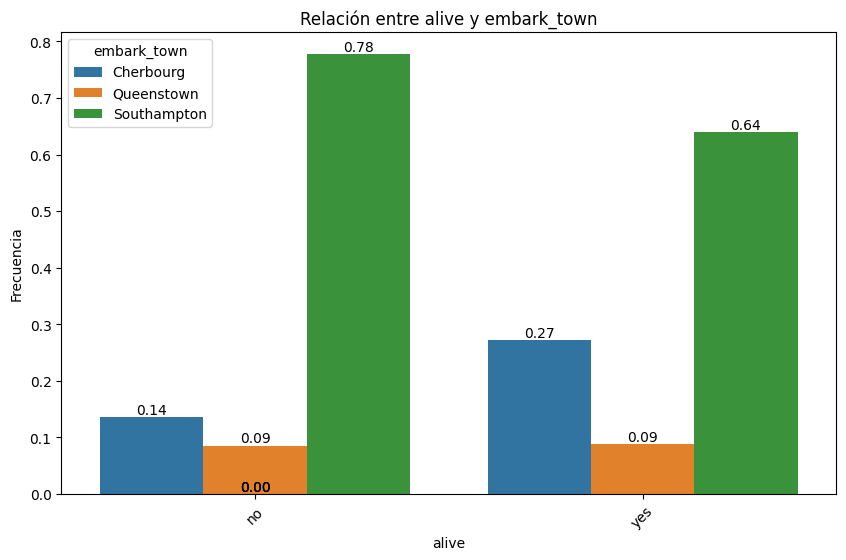

In [30]:
#6
plot_categorical_relationship_fin(df_titanic_cleaned,"alive","embark_town", relative_freq= True, show_values= True)

In [ ]:
#Hecho en clase
#def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
#     col_directora = directora
#     col_1 = cat2
#     col_2 = num1
#     diccionario_multivariante = {}
#     for valor in df[col_directora].unique():
#         diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 
#     for valor,df_datos in diccionario_multivariante.items():
#         print(f"Respuesta {valor}:")
#         plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size, bins = bins)


In [ ]:
#trivariant_analysis(df_titanic_cleaned, "embark_town", "alive", "fare", 2 ,30)

In [34]:
#7
survival_class_age = df_titanic_cleaned.groupby(['class', 'age_group', 'alive']).size().unstack(fill_value=0)
survival_class_age['Total'] = survival_class_age.sum(axis=1)
survival_class_age['Survival Rate'] = survival_class_age['yes'] / survival_class_age['Total'] * 100

# Resultados
print("Supervivencia por clase y grupo de edad:")
print(survival_class_age)

Supervivencia por clase y grupo de edad:
alive              no  yes  Total  Survival Rate
class  age_group                                
First  Adult       79  125    204      61.274510
       Child        1   11     12      91.666667
Second Adult       95   66    161      40.993789
       Child        2   21     23      91.304348
Third  Adult      323   90    413      21.791768
       Child       49   29     78      37.179487


***En términos absolutos:***
Los adultos en primera clase representaron la mayor cantidad de supervivientes.

***En términos relativos:***
Los niños en primera clase tuvieron la tasa de supervivencia más alta.

***Conclusión:***
La combinación de clase alta y ser niño incrementó significativamente las probabilidades de sobrevivir.

In [ ]:
#8
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [39]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_7/Unidad_2/Practica_Obligatoria/data/dataset_viajes_jun23.csv")
df

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [48]:
trips_per_company = df['aircompany'].value_counts()
trips_per_company

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

In [51]:
average_income_by_company = df.groupby('aircompany')['ingresos'].mean()
average_income_by_company

aircompany
Airnar        405293.978200
FlyQ          401619.008056
MoldaviAir    548077.209098
PamPangea     478417.048718
TabarAir      271042.230282
Name: ingresos, dtype: float64

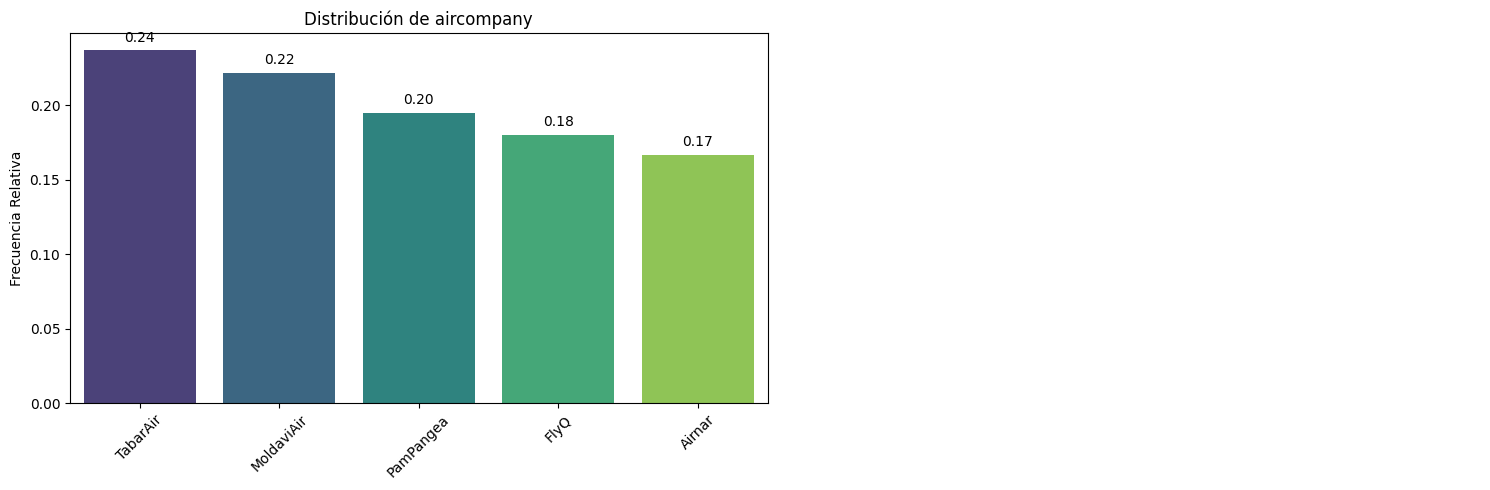

In [43]:
pinta_distribucion_categoricas(df,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


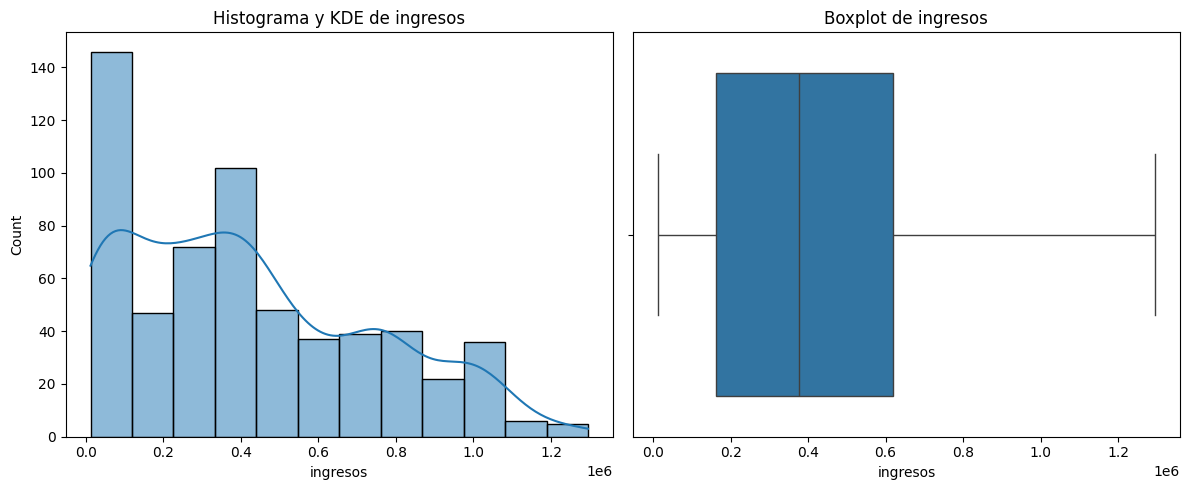

In [44]:
plot_combined_graphs(df,["ingresos"])

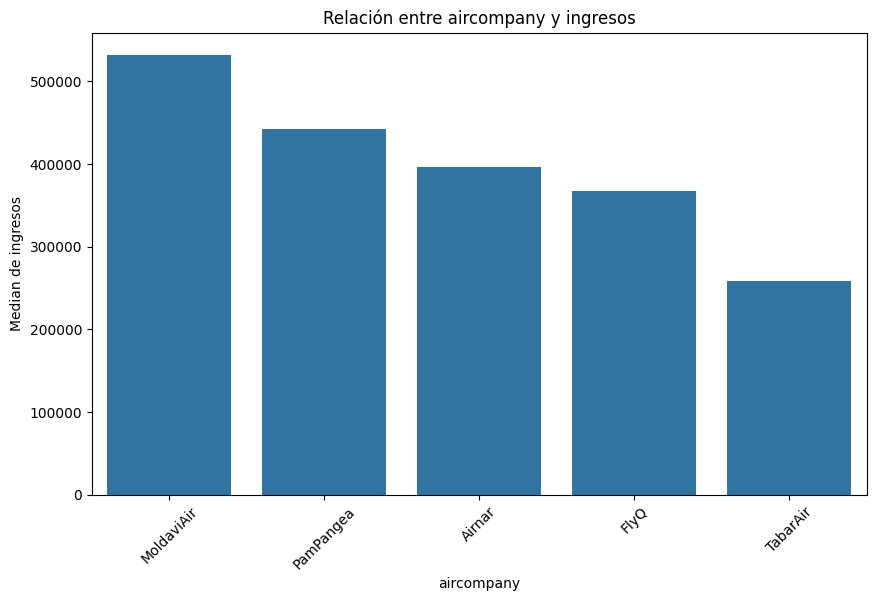

In [42]:
plot_categorical_numerical_relationship(df,"aircompany","ingresos", measure = "median")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [52]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta Airnar:


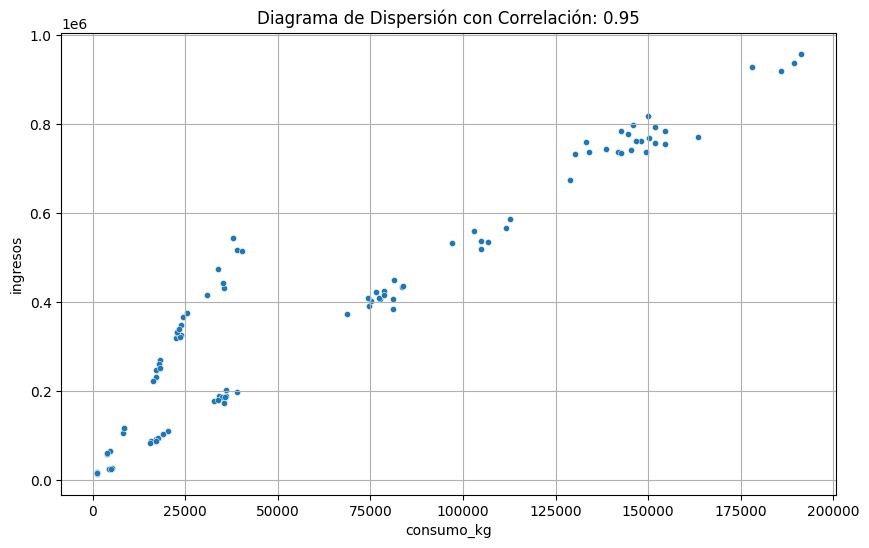

Respuesta FlyQ:


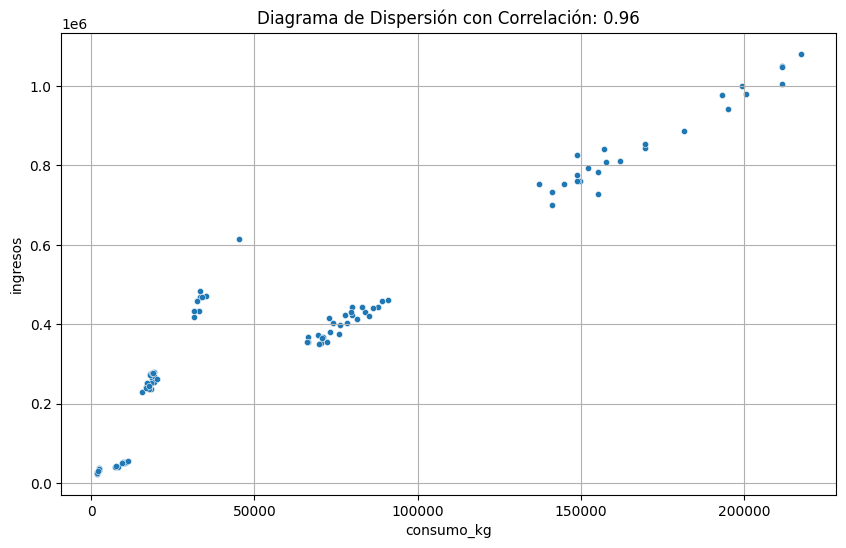

Respuesta TabarAir:


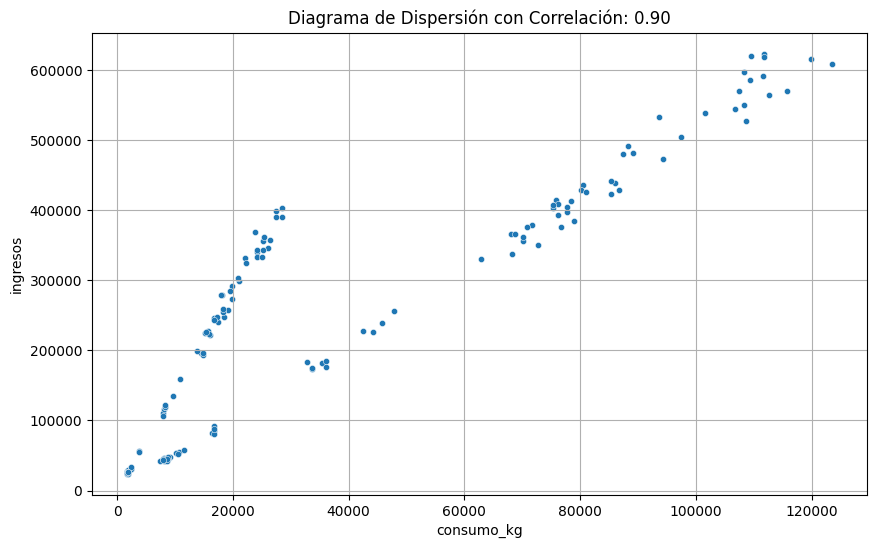

Respuesta MoldaviAir:


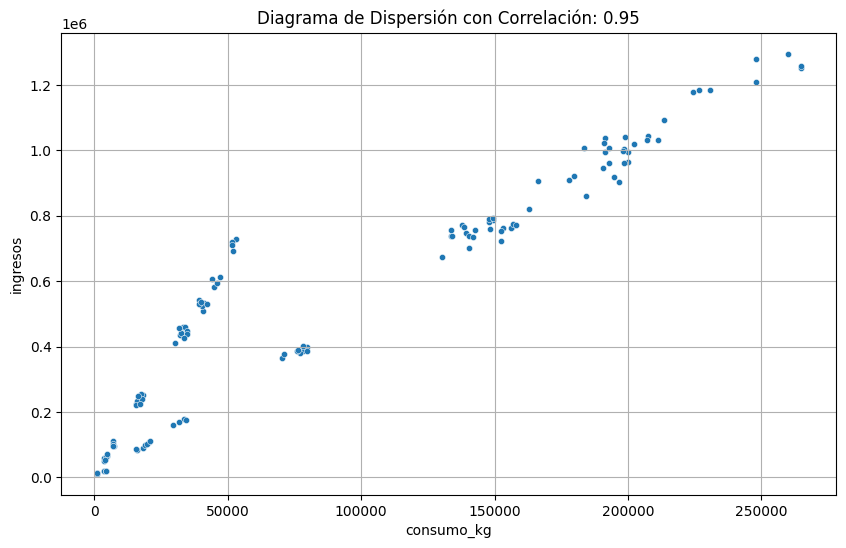

Respuesta PamPangea:


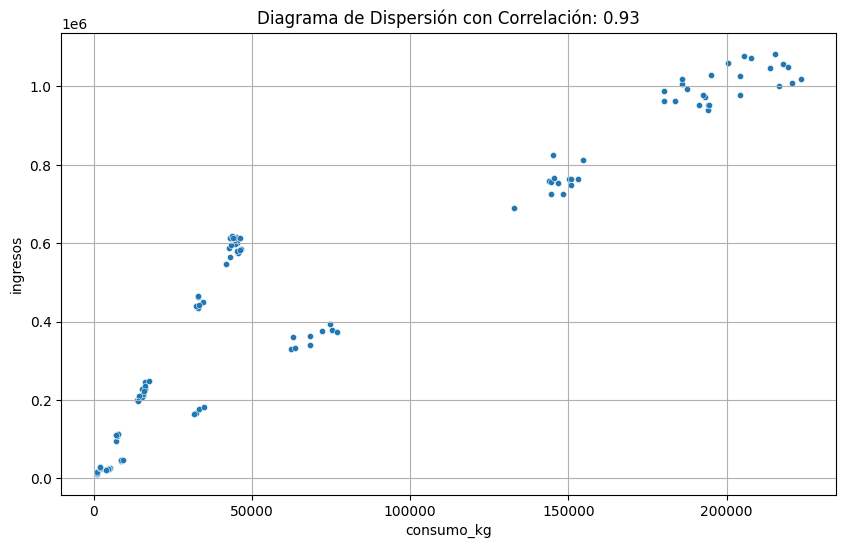

In [53]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

Podemos ver que los vuelos más cortos son mucho más rentables que los largos.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [55]:

distancia_quantiles = df['distancia'].quantile([0.25, 0.5, 0.75]).values
distancia_bins = [0] + list(distancia_quantiles) + [df['distancia'].max()]

cat_labels = ['Corta', 'Media', 'Larga', 'Muy Larga']

df['cat_vuelo'] = pd.cut(df['distancia'], bins=distancia_bins, labels=cat_labels, include_lowest=True)

multivariate_analysis = df.groupby('cat_vuelo').agg({'ingresos': ['mean', 'median', 'sum'],'consumo_kg': ['mean', 'median', 'sum']}).reset_index()

multivariate_analysis


/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_6805/2791499944.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multivariate_analysis = df.groupby('cat_vuelo').agg({'ingresos': ['mean', 'median', 'sum'],'consumo_kg': ['mean', 'median', 'sum']}).reset_index()


cat_vuelo       ingresos                               consumo_kg  \
                       mean      median           sum           mean   
0      Corta   69372.754471   50949.395  1.179337e+07   10325.614191   
1      Media  305331.327023  277928.680  3.999840e+07   44962.786199   
2      Larga  524261.032994  461570.180  8.230898e+07   84527.926838   
3  Muy Larga  825074.342394  848798.055  1.171606e+08  141041.890049   

                                
          median           sum  
0    7191.913050  1.755354e+06  
1   44145.192000  5.890125e+06  
2   87710.480000  1.327088e+07  
3  167982.764768  2.002795e+07

In [56]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta Corta:


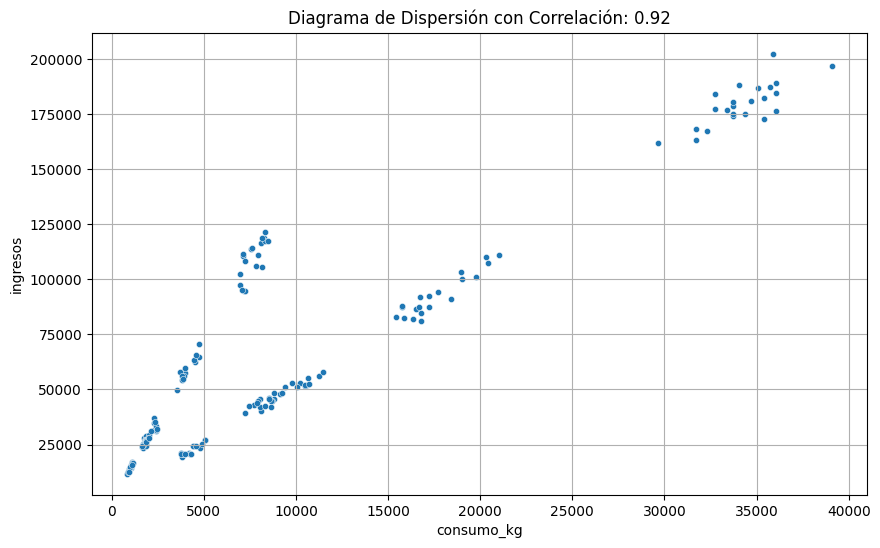

Respuesta Muy Larga:


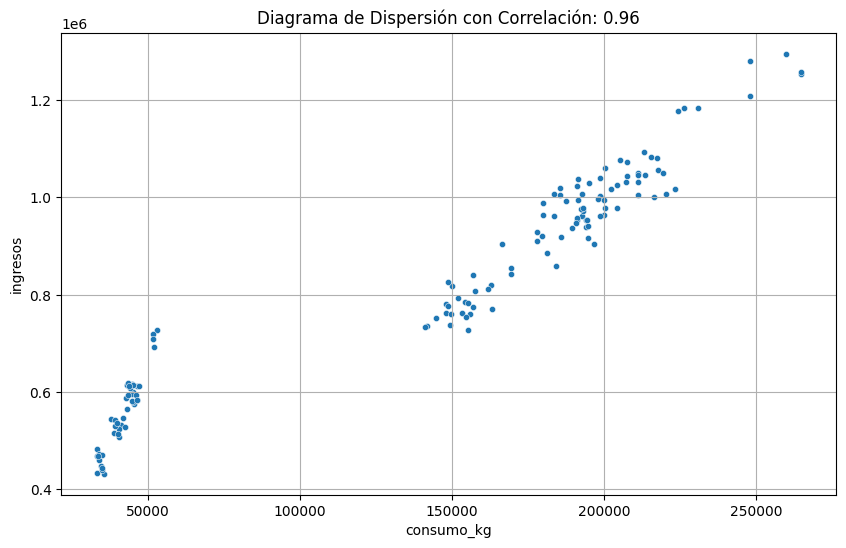

Respuesta Larga:


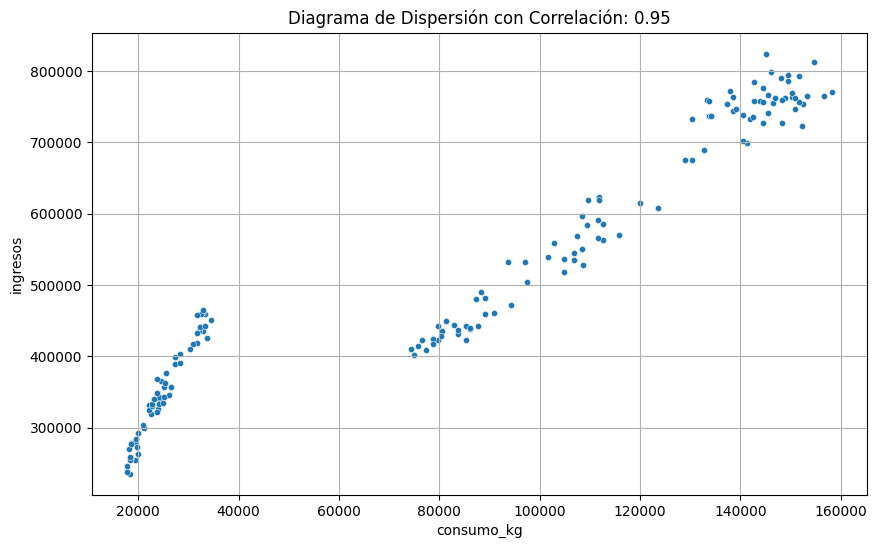

Respuesta Media:


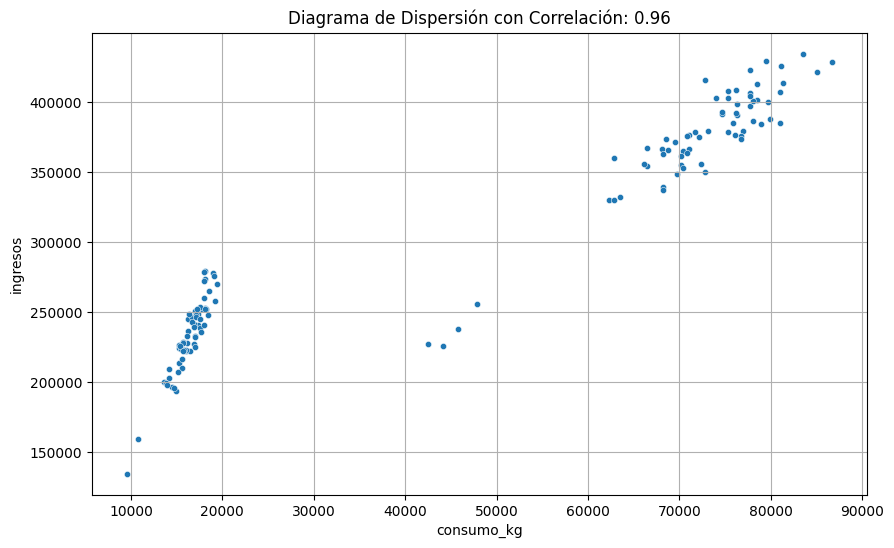

In [57]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [61]:
df['income_per_kg'] = df['ingresos'] / df['consumo_kg']
df['kg_per_km'] = df['consumo_kg'] / df['distancia']

In [60]:
analisis = df[['income_per_kg', 'kg_per_km']].describe()
analisis

,income_per_kg,kg_per_km
count,600.000000,600.000000
mean,8.904848,7.934756
std,4.407691,4.537013
min,4.554666,2.430000
25%,5.131672,2.660600
50%,5.459427,11.086400
75%,13.855693,11.906800
max,16.213469,13.224640


In [65]:
super_efficiency_threshold_income_per_kg = df['income_per_kg'].quantile(0.75)
super_efficiency_threshold_kg_per_km = df['kg_per_km'].quantile(0.25)

df['super_efficient'] = (
    (df['income_per_kg'] >= super_efficiency_threshold_income_per_kg) &(df['kg_per_km'] <= super_efficiency_threshold_kg_per_km) 
)

efficiency_airline_analysis = df.groupby(['aircompany', 'super_efficient']).size().unstack(fill_value=0)
efficiency_airline_analysis

super_efficient,False,True
aircompany,,
Airnar,91,9
FlyQ,93,15
MoldaviAir,117,16
PamPangea,91,26
TabarAir,115,27


In [67]:
multivariate_analysis = df.groupby(['aircompany', 'super_efficient', 'avion', 'origen', 'destino']).agg({
    'ingresos': 'sum',
    'consumo_kg': 'sum',
    'distancia': 'mean'
}).reset_index()

multivariate_analysis

,aircompany,super_efficient,avion,origen,destino,ingresos,consumo_kg,distancia
0,Airnar,False,Airbus A320,Cincinnati,Los Angeles,117201.01,8484.553000,3073.0
1,Airnar,False,Airbus A320,Cincinnati,París,252160.09,18124.790320,6370.0
2,Airnar,False,Airbus A320,Cádiz,Cincinnati,259899.94,17982.941184,6624.0
3,Airnar,False,Airbus A320,Cádiz,Los Angeles,375988.83,25445.970368,9373.0
4,Airnar,False,Airbus A320,Ginebra,Los Angeles,365564.22,24475.345336,9103.0
...,...,...,...,...,...,...,...,...
404,TabarAir,True,Boeing 737,Los Angeles,Londres,323860.65,22201.452000,8785.0
405,TabarAir,True,Boeing 737,Nueva York,Los Angeles,134820.81,9583.920000,3944.0
406,TabarAir,True,Boeing 737,Nueva York,Roma,240972.01,17379.554400,6877.0
407,TabarAir,True,Boeing 737,Roma,Cincinnati,516470.18,36898.092000,7480.0
